# What's in this notebook?
Preparing data for analysis - extracting the ingredients & including as features, getting features from the directions (such as oven temperature), etc.

In [223]:
import pickle
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook
import seaborn as sns

In [7]:
with open('../data/dataframe.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

In [8]:
data

,directions,ingredients,link,nutrition,rating
0,[Preheat oven to 350 degrees F (175 degrees C)...,"[1 (9 inch) pie shell, 1 (8 ounce) package cre...",https://www.allrecipes.com/recipe/16052/paradi...,"{'calories': '361 calories;', 'fatContent': '1...",4.4
1,[Preheat oven to 425 degrees F (220 degrees C....,[1 recipe pastry for a 9 inch single crust pie...,https://www.allrecipes.com/recipe/12141/moms-p...,"{'calories': '345 calories;', 'fatContent': '1...",4.5
2,[Preheat oven to 425 degrees F (220 degrees C)...,"[1 (15 ounce) can pumpkin puree, 3 egg yolks, ...",https://www.allrecipes.com/recipe/230132/chef-...,"{'calories': '320 calories;', 'fatContent': '1...",4.8
3,[Preheat oven to 350 degrees F (175 degrees C)...,"[2 prepared pie crusts, 3 eggs, divided, 1 (8 ...",https://www.allrecipes.com/recipe/219025/mini-...,"{'calories': '138 calories;', 'fatContent': '8...",4.8
4,[Line one 9 inch pie pan with whole gingersnap...,"[1 cup pumpkin puree, 3 eggs, 1/2 cup white su...",https://www.allrecipes.com/recipe/9121/dads-pu...,"{'calories': '343 calories;', 'fatContent': '1...",4.4
5,[Preheat oven to 375 degrees F (190 degrees C)...,[1 recipe pastry for a 9 inch single crust pie...,https://www.allrecipes.com/recipe/13504/gourme...,"{'calories': '310 calories;', 'fatContent': '1...",4.0
6,[Preheat oven to 375 degrees F (190 degrees C)...,"[1 (9 inch) unbaked pie crust, 3/4 cup toffee ...",https://www.allrecipes.com/recipe/24198/pumpki...,"{'calories': '504 calories;', 'fatContent': '2...",4.5
7,[Preheat oven to 350 degrees F (175 degrees C)...,"[1 (9 inch) pie shell, 1 (8 ounce) package cre...",https://www.allrecipes.com/recipe/15947/old-fa...,"{'calories': '430 calories;', 'fatContent': '2...",4.6
8,"[Preheat oven to 425 degrees F. Whisk pumpkin,...","[1 (15 ounce) can pumpkin, 1 (14 ounce) can EA...",https://www.allrecipes.com/recipe/23439/perfec...,"{'calories': '379 calories;', 'fatContent': '1...",4.7
9,"[Preheat oven to 425 degrees F., Combine sugar...","[1 (9 inch) unbaked deep dish pie crust, 3/4 c...",https://www.allrecipes.com/recipe/22755/libbys...,"{'calories': '283 calories;', 'fatContent': '1...",4.8


In [92]:
# ingredients = set()
# for ingredient_list in data.ingredients:
#     ingredients.add
    
ingredients = [ingredient for ingredient_list in data.ingredients for ingredient in ingredient_list]

In [14]:
ingredients

['1 (9 inch) pie shell',
 '1 (8 ounce) package cream cheese, softened',
 '1/4 cup white sugar',
 '1/2 teaspoon vanilla extract',
 '1 egg, beaten',
 '1 1/4 cups pumpkin puree',
 '1 cup evaporated milk',
 '1/2 cup white sugar',
 '2 eggs, beaten',
 '1 teaspoon ground cinnamon',
 '1/4 teaspoon ground ginger',
 '1/4 teaspoon ground nutmeg',
 '1 pinch salt',
 '1/4 cup maple syrup',
 '1 recipe pastry for a 9 inch single crust pie',
 '3 eggs',
 '1 egg yolk',
 '1/2 cup white sugar',
 '1/2 cup packed brown sugar',
 '1 teaspoon salt',
 '1/2 teaspoon ground cinnamon',
 '1/2 teaspoon ground nutmeg',
 '1/2 teaspoon ground ginger',
 '1/4 teaspoon ground cloves',
 '1 1/2 cups milk',
 '1/2 cup heavy whipping cream',
 '2 cups pumpkin puree',
 '1 (15 ounce) can pumpkin puree',
 '3 egg yolks',
 '1 large egg',
 '1 (14 ounce) can sweetened condensed milk',
 '1 teaspoon ground cinnamon',
 '1/2 teaspoon ground ginger',
 '1/2 teaspoon fine salt',
 '1/4 teaspoon freshly grated nutmeg',
 '1/8 teaspoon Chinese 5-

Great! Now we have a whole list of ingredients from every single recipe! The next few things I want to do is get rid of some weird things, like how the ingredients are sometimes separated into different parts. For example, the scraped ingredients sometimes list a component of the recipe, like "walnut topping", as an ingredient, when it's really a title of a group of ingredients, so we'll get rid of those. Also, I want to get rid of the measurements and just get the ingredients themselves. 

I'm also thinking that I'll create a boolean column vector for each recipe with all these ingredients, indicating whether the ingredient is in the recipe or not. Then we can use cosine similarity and see what recipes are similar. We can also cluster recipes using k-means and see what sort of categories these fall under! But that's for another notebook.

To start, I'll get rid of the measurements. To do this, I'll create a list of measurements, like 'teaspoon', remove numbers, and remove things in parenthases (which generally denote measurements like how many ounces should be in a can or the diameter of a pie crust). 

In [346]:
# will need to check for plural versions as well
measurements = ['teaspoon', 'cup', 'tablespoon', 'gram', 'ounce', 'pinch', 
                'canned', 'can', 'package', 'size', 'container', 'inch',
               'fluid ounce', 'packets', 'pack', 'jar', 'granuled', 'large',
               'sheets', 'recipe', 'medium', 'pint', 'solid', 'tub', 'slice',
               'envelope', 'deep dish', 'as needed', 'halves', 'or more to taste', 
               'or to taste', 'pound', 'quart', 'pieces', 'dash'] 
preparations = ['packed', 'chopped', 'diced', 'softened', 'beaten', 
                'lightly', 'cold', 'room temperature', 'thawed', 'frozen',
               'unbaked', 'baked', 'finely', 'melted', 'cubed', 'seeded',
               'halved', 'divided', 'mashed', 'cooked', 'warmed', 'crushed',
               'prepared', 'peeled', 'pureed', 'raw', 'cut in half', 'warm',
               'puree', 'pie filling', 'single crust pie', 'ground', 'flavored',
               'freshly', 'fresh', 'grated', 'processed', 'firmly', 'fine', 'cooled',
               'chilled', 'cut into squares', 'minced', 'plus', 'unwrapped']
stopwords = ['for', 'at', 'the', 'a', 'of', ' s ', ' ed', 'and', 'slightly']
brands = ['karo', 'spice island', 'carnation', 'eagle', 'planters', 
          'mccormick', 'jell o']

new_ingredients  = []

ingredient_dict = {}

for ingredient in tqdm_notebook(ingredients):
    original = ingredient
    # get rid of ingredients that aren't actually ingredients, but titles
    if ':' in ingredient:
        pass
    else:
        # get rid of words and other characters specified above
        for punc_or_num in "',./1234567890%":
            ingredient = ingredient.replace(punc_or_num, '')
            
        # just for '-' replace with a space
        ingredient = ingredient.replace('-', ' ')
        
        for measurement in measurements:
            ingredient = re.sub(f"\\b{measurement}s?\\b", '', ingredient)

        for preparation in preparations:
            ingredient = re.sub(f"\\b{preparation}s?\\b", '', ingredient)

        for word in stopwords:
            ingredient = re.sub(f"\\b{word}s?\\b", '', ingredient)

        for brand in brands:
            ingredient = re.sub(f"^{brand}|\\b{brand}s?\\b", '', ingredient.lower())
        
        
        # get rid of stuff in the parentheticals
        ingredient = re.sub('\(.*\)', '', ingredient)
        
        # get rid of leading spaces or endings
        ingredient = re.sub('^ed', '', ingredient)
        ingredient = re.sub('^s | s+$', '', ingredient)
        ingredient = re.sub('^\s+|\s+$', '', ingredient)
        ingredient = re.sub('[a-zA-Z]+(s$)', '', ingredient, flags=re.MULTILINE)
        
        # replace egg with eggs and vanilla extract with vanilla for consistency
        ingredient = re.sub('eggs*', 'eggs', ingredient)
        if ingredient == 'vanilla extract':
            ingredient = 'vanilla'
    
        if ingredient != '':
            new_ingredients.append(ingredient)
        
        ingredient_dict[original] = ingredient
        

In [347]:
new_ingredients

['pie shell',
 'cream cheese',
 'white sugar',
 'vanilla',
 'eggs',
 'pumpkin',
 'evaporated milk',
 'white sugar',
 'cinnamon',
 'ginger',
 'nutmeg',
 'salt',
 'maple syrup',
 'pastry',
 'eggs yolk',
 'white sugar',
 'brown sugar',
 'salt',
 'cinnamon',
 'nutmeg',
 'ginger',
 'milk',
 'heavy whipping cream',
 'pumpkin',
 'pumpkin',
 'eggs ',
 'eggs',
 'sweetened condensed milk',
 'cinnamon',
 'ginger',
 'salt',
 'nutmeg',
 'chinese  spice powder',
 'pie crust',
 'pie ',
 'cream cheese',
 'white sugar',
 'pumpkin',
 'vanilla',
 'pumpkin pie spice',
 'pumpkin',
 'white sugar',
 'milk',
 'salt',
 'pumpkin pie spice',
 'butter',
 'unflavored gelatin',
 'water',
 'white sugar',
 'gingersnap ',
 'pastry',
 'pumpkin',
 'eggs',
 'sweetened condensed milk',
 'brown sugar',
 'all purpose flour',
 'butter',
 'cinnamon',
 'pie crust',
 'toffee baking ',
 'pumpkin',
 'white sugar',
 'light brown sugar',
 'cinnamon',
 'ginger',
 'nutmeg',
 'vanilla',
 'salt',
 'milk',
 'heavy cream',
 'pie shell',


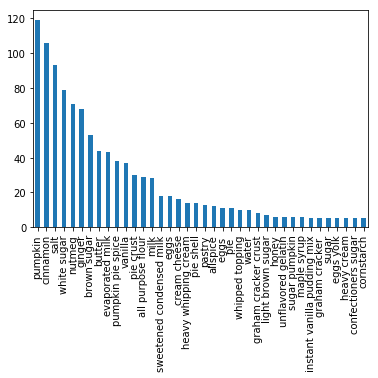

In [348]:
pd.Series(new_ingredients).value_counts()[pd.Series(new_ingredients).value_counts() >=5].plot('bar')

In [349]:
len(set(new_ingredients)) #191 new ingredients!

191

In [350]:
set(ingredient_dict.values())

{'',
 'all purpose flour',
 'allspice',
 'almond flour',
 'almond milk',
 'amber rum',
 'apple butter',
 'apricot ',
 'arrowroot powder',
 'artificial sweetener',
 'aspartame artificial sweetener',
 'baking',
 'baking powder',
 'baking soda',
 'biscuit baking mix',
 'bittersweet baking chocolate',
 'box yellow cake mix',
 'brandy',
 'brown sugar',
 'butter',
 'buttermilk baking mix',
 'cane sugar',
 'canola oil',
 'caramel dessert topping',
 'caramel ice cream topping',
 'caramel topping',
 'chia ',
 'chinese  spice powder',
 'chocolate ',
 'chocolate cookie crumb crust',
 'cinnamon',
 'classic crisco pie crust',
 'coarsely  ',
 'coarsely  graham cracker',
 'coconut ',
 'coconut milk',
 'coconut oil',
 'coffee  liqueur',
 'confectioners sugar',
 'confectioners sugar or',
 'cooking spray',
 'cool whip whipped topping',
 'cornstarch',
 'cream  tartar',
 'cream cheese',
 'dark ',
 'dark brown sugar',
 'dark corn syrup',
 'date sugar',
 'demerara sugar',
 'distilled white vinegar',
 'dry m

In [351]:
def create_ingred_vector(ingredients_list):
    vector = []
    new_ingredients = [] # keep track of what the ingredients now are
    for ingred in ingredients_list:
        try: 
            new_ingredients.append(ingredient_dict[ingred])
        except KeyError:
            pass
    
    for ingred in set(ingredient_dict.values()):
        if ingred in new_ingredients:
            vector.append(1)
        else:
            vector.append(0)
    return vector
    
data['ingredient_vector'] = data.apply(lambda x: create_ingred_vector(x.ingredients) ,axis=1)

Now that that's all part of the data frame, I want to get the oven temp when it exists in directions, break out the nutrition info, and ______, in order to gather features so we can start running regressions and k-means 'n stuff!